<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Data Source: MovieLens web site <br><br>
Location: https://grouplens.org/datasets/movielens/ <br>
</p><br><br>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>



</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Let us look at the files in this dataset

</p> 

In [2]:
!ls ./movielens

genome-scores.csv  links.csv   movies.csv   README.txt
genome-tags.csv    ml-20m.zip  ratings.csv  tags.csv


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Use Pandas to read the dataset<br></p>

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

<br>  In this notebook, we will be using three CSV files<br>
<br> 1 ratings.csv : userId,movieId,rating,timestamp<br>
<br> 2 tags.csv : userId,movieId,tag,timestamp<br>
<br> 3 movies.csv : movieId,title,genres<br>
</p>

In [3]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [4]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

In [5]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

In [6]:
# For current analysis, we will remove timestamp

del ratings['timestamp']
del tags['timestamp']

## <br><br><h1 style="font-size:2em;color:#2467C0">Statistics: Let us look how the ratings are distributed </h1><br><br><br><br><br>

In [7]:
ratings.describe()['rating']

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

## <br><br><h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1><br><br><br><br><br>

In [8]:
#is any row NULL ?

movies.isnull().any(), movies.shape

(movieId    False
 title      False
 genres     False
 dtype: bool, (27278, 3))

Thats nice ! No NULL values !

In [9]:
#is any row NULL ?

ratings.isnull().any(), ratings.shape

(userId     False
 movieId    False
 rating     False
 dtype: bool, (20000263, 3))

Thats nice ! No NULL values !

In [10]:
#is any row NULL ?

tags.isnull().any(), tags.shape

(userId     False
 movieId    False
 tag         True
 dtype: bool, (465564, 3))

We have some tags which are NULL.

In [11]:
tags = tags.dropna()

In [12]:
#Check again: is any row NULL ?

tags.isnull().any(), tags.shape

(userId     False
 movieId    False
 tag        False
 dtype: bool, (465548, 3))

Thats nice ! No NULL values ! Notice the number of lines have reduced.

## <br><br><h1 style="font-size:2em;color:#2467C0">Data Visualization</h1><br><br><br><br><br>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6274b1d710>]], dtype=object)

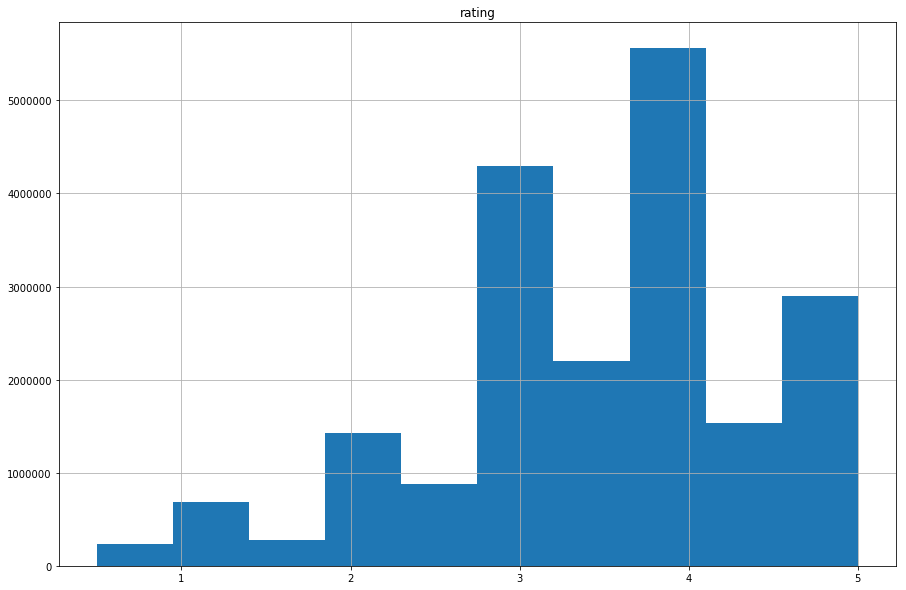

In [13]:
%matplotlib inline

ratings[:].hist(column='rating', figsize=(15,10))

<br><br><h1 style="font-size:2em;color:#2467C0">





</h1><br><br><br><br><br>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Cleaning up messy data  

</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

How to take slices and get columns

</p>

In [14]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [15]:
movies[['title','genres']].head()

title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [16]:
ratings[1000:1010]

userId  movieId  rating
1000      11      527     4.5
1001      11      531     4.5
1002      11      541     4.5
1003      11      546     5.0
1004      11      551     5.0
1005      11      586     4.0
1006      11      587     4.5
1007      11      588     5.0
1008      11      589     4.5
1009      11      592     4.5

In [17]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

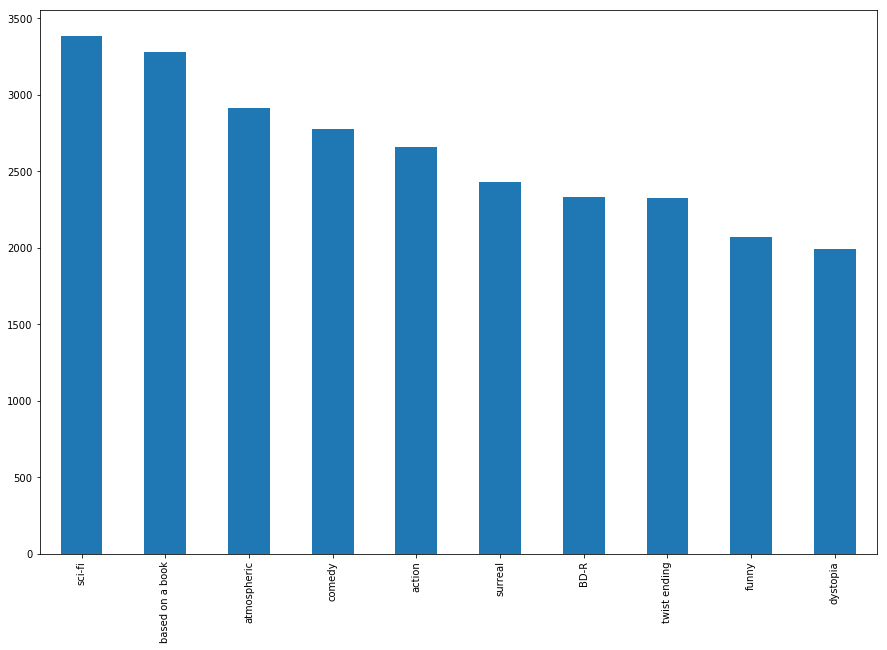

In [18]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Slicing and Dicing and learn how to filter dataframes  

</p>

In [27]:
avg_ratings = ratings.groupby('movieId').mean()
avg_ratings.head()

userId    rating
movieId                        
1        69282.396821  3.921240
2        69169.928202  3.211977
3        69072.079388  3.151040
4        69652.913280  2.861393
5        69113.475454  3.064592

In [37]:
box_office = movies.merge(ratings, on='movieId', how='inner')
box_office.tail()

movieId                          title                    genres  \
20000258   131254   Kein Bund f端r's Leben (2007)                    Comedy   
20000259   131256  Feuer, Eis & Dosenbier (2002)                    Comedy   
20000260   131258             The Pirates (2014)                 Adventure   
20000261   131260            Rentun Ruusu (2001)        (no genres listed)   
20000262   131262               Innocence (2014)  Adventure|Fantasy|Horror   

          userId  rating  
20000258   79570     4.0  
20000259   79570     4.0  
20000260   28906     2.5  
20000261   65409     3.0  
20000262  133047     4.0

In [41]:
is_highly_rated = box_office['rating'] >= 3.0

box_office[is_highly_rated][-5:]

movieId                                              title  \
20000257   131252  Forklift Driver Klaus: The First Day on the Jo...   
20000258   131254                       Kein Bund f端r's Leben (2007)   
20000259   131256                      Feuer, Eis & Dosenbier (2002)   
20000261   131260                                Rentun Ruusu (2001)   
20000262   131262                                   Innocence (2014)   

                            genres  userId  rating  
20000257             Comedy|Horror   79570     4.0  
20000258                    Comedy   79570     4.0  
20000259                    Comedy   79570     4.0  
20000261        (no genres listed)   65409     3.0  
20000262  Adventure|Fantasy|Horror  133047     4.0

In [42]:
is_lowly_rated = box_office['rating']  <= 1.0

box_office[is_lowly_rated][-5:]

movieId                  title                genres  userId  rating
20000151   130900   Mr. Troop Mom (2009)       Children|Comedy   74142     0.5
20000173   131013        Get Hard (2015)                Comedy  111949     0.5
20000190   131062  20 Years After (2008)  Drama|Fantasy|Sci-Fi   79570     0.5
20000235   131152     The Fat Spy (1966)                Comedy   74937     0.5
20000246   131172  Closed Curtain (2013)    (no genres listed)  128309     1.0

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Groupby/Aggregate  

</p>

In [ ]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br> 

Combine Dataframes

</p>

In [ ]:
tags.head()

In [ ]:
movies.head()

In [ ]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Vectorized String Operations
</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Parsing Unix timestamps  

</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Web Scraping
</p>

## <br><br><h1 style="font-size:2em;color:#2467C0">Data Visualization:</h1><br><br><br><br><br>

In [ ]:
numeric_cols = []

for column in df:
    if 'int' in str(df[column].dtype):
        numeric_cols.append(column)

numeric_cols.remove('balance')

In [ ]:
# How do these numeric columns relate to 'balance'
correlations = [ df['balance'].corr(df[f]) for f in numeric_cols ]

In [ ]:
len(numeric_cols), len(correlations)

In [ ]:
import matplotlib.pyplot as plt
import random

df2 = pd.DataFrame({'attributes': numeric_cols, 'correlation': correlations}) 

color=random.choice(['blue','red','orange']) #pick a color randomly

fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.ylabel('Player\'s Overall Rating')

ax = df2.correlation.plot(linewidth=3.3, color=color)
ax.set_xticks(df2.index)
ax.set_xticklabels(df2.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
plt.show()